<a href="https://colab.research.google.com/github/FaizanHassanSiddiqui/Assignments-Repository/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import os
import random
import shutil
import cv2

import matplotlib.pyplot as plt

In [33]:
# labels zip file brought into the directory of this notebook

!gdown --id 1qmuSz3f_hxp2K03tYiyPFKhk862eGIYY

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qmuSz3f_hxp2K03tYiyPFKhk862eGIYY
To: /content/labels.zip
100% 39.9k/39.9k [00:00<00:00, 54.3MB/s]


In [34]:
# images zip file brought into the directory of this notebook

!gdown --id 1ydelW2l_0ffQ-Iv3rzrxyr811ags0srM

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ydelW2l_0ffQ-Iv3rzrxyr811ags0srM
To: /content/dataset.zip
100% 920M/920M [00:03<00:00, 291MB/s]


In [42]:
# unzip images
!unzip -u "/content/dataset.zip" -d "/content/dataset/images"

Archive:  /content/dataset.zip
   creating: /content/dataset/images/dataset/
  inflating: /content/dataset/images/dataset/ (1).JPG  
  inflating: /content/dataset/images/dataset/ (10).JPG  
  inflating: /content/dataset/images/dataset/ (100).JPG  
  inflating: /content/dataset/images/dataset/ (101).JPG  
  inflating: /content/dataset/images/dataset/ (102).JPG  
  inflating: /content/dataset/images/dataset/ (103).JPG  
  inflating: /content/dataset/images/dataset/ (104).JPG  
  inflating: /content/dataset/images/dataset/ (105).JPG  
  inflating: /content/dataset/images/dataset/ (106).JPG  
  inflating: /content/dataset/images/dataset/ (107).JPG  
  inflating: /content/dataset/images/dataset/ (108).JPG  
  inflating: /content/dataset/images/dataset/ (109).JPG  
  inflating: /content/dataset/images/dataset/ (11).JPG  
  inflating: /content/dataset/images/dataset/ (110).JPG  
  inflating: /content/dataset/images/dataset/ (111).JPG  
  inflating: /content/dataset/images/dataset/ (112).JPG  

In [43]:

# unzip labels
!unzip -u "/content/labels.zip" -d "/content/dataset/labels"

Archive:  /content/labels.zip
 extracting: /content/dataset/labels/ (1).txt  
 extracting: /content/dataset/labels/ (10).txt  
 extracting: /content/dataset/labels/ (100).txt  
 extracting: /content/dataset/labels/ (101).txt  
 extracting: /content/dataset/labels/ (102).txt  
 extracting: /content/dataset/labels/ (103).txt  
 extracting: /content/dataset/labels/ (104).txt  
 extracting: /content/dataset/labels/ (105).txt  
 extracting: /content/dataset/labels/ (106).txt  
 extracting: /content/dataset/labels/ (107).txt  
 extracting: /content/dataset/labels/ (108).txt  
 extracting: /content/dataset/labels/ (109).txt  
 extracting: /content/dataset/labels/ (11).txt  
 extracting: /content/dataset/labels/ (110).txt  
 extracting: /content/dataset/labels/ (111).txt  
 extracting: /content/dataset/labels/ (112).txt  
 extracting: /content/dataset/labels/ (113).txt  
 extracting: /content/dataset/labels/ (114).txt  
 extracting: /content/dataset/labels/ (115).txt  
 extracting: /content/da

In [44]:
!pwd

/content


In [45]:
images_datset_path = '/content/dataset/images/dataset'

labels_path = '/content/dataset/labels'

In [46]:
images_files =  os.listdir(images_datset_path)

In [47]:
labels_files = os.listdir(labels_path)


In [48]:
indices = list(range(232))

train_indices = random.sample(indices, 200)

val_indices = [index for index in indices if index not in train_indices]

In [49]:
training_label_files = []
training_images_images = []

for index in train_indices:
    label_file = labels_files[index]
    number = label_file.strip(' (').strip(').txt')
    training_label_files.append(label_file)
    training_images_images.append(f' ({number}).JPG')

val_label_files = []
val_images_images = []

for index in val_indices:
    label_file = labels_files[index]
    number = label_file.strip(' (').strip(').txt')
    val_label_files.append(label_file)
    val_images_images.append(f' ({number}).JPG')

In [50]:
len(training_label_files), len(training_images_images), len(val_label_files), len(val_images_images)

(200, 200, 32, 32)

In [55]:
!pwd

/content


In [57]:
# os.mkdir('./stationery_dataset')

In [58]:
copy_path = '/content/stationery_dataset/labels/train'

for file in training_label_files:
    with open(f'/content/dataset/labels/{file}') as f:
        f_content = f.read()
    new_file_name = file.replace('(','').replace(')', '')
    with open(os.path.join(copy_path, new_file_name), 'w' ) as f:
        f.write(f_content)

In [59]:
copy_path = '/content/stationery_dataset/labels/val'

for file in val_label_files:
    with open(f'/content/dataset/labels/{file}') as f:
        f_content = f.read()
    new_file_name = file.replace('(','').replace(')', '')
    with open(os.path.join(copy_path, new_file_name), 'w' ) as f:
        f.write(f_content)

In [60]:
copy_path = '/content/stationery_dataset/images/train'

for file in training_images_images:

    new_file_name = file.replace('(','').replace(')', '')
    src_file_path = os.path.join('/content/dataset/images/dataset', file)
    dest_path = os.path.join(copy_path, new_file_name)
    shutil.copy(src_file_path, dest_path)

In [61]:
copy_path = '/content/stationery_dataset/images/val'

for file in val_images_images:

    new_file_name = file.replace('(','').replace(')', '')
    src_file_path = os.path.join('/content/dataset/images/dataset', file)
    dest_path = os.path.join(copy_path, new_file_name)
    shutil.copy(src_file_path, dest_path)

In [ ]:
# to empty a directory


# dir = '/content/stationery_dataset/labels/val'

# for file in os.listdir(dir):
#   try:
#     os.remove(os.path.join(dir, file))
#   except:
#     os.rmdir(os.path.join(dir, file))


In [64]:
os.listdir('/content/stationery_dataset/labels/train').__len__()

200

In [63]:
os.listdir('/content/stationery_dataset/images/val').__len__()

32

In [66]:
img_path = '/content/stationery_dataset/images/train/ 1.JPG'

img = cv2.imread(img_path)

In [67]:
img_height, img_width, _ = img.shape

In [68]:
label_path = '/content/stationery_dataset/labels/train/ 1.txt'

with open(label_path) as f:
  file_content = f.readlines()

print(file_content)

['0 0.573421 0.362335 0.264317 0.442731\n', '0 0.282673 0.452643 0.199706 0.425110\n', '0 0.576358 0.792952 0.587372 0.132159']


In [69]:


for detection in file_content:
  label, centre_x, centre_y, width, height = detection.strip().split()

  centre_x, centre_y, width, height = float(centre_x), float(centre_y), float(width) , float(height)

  upper_x = centre_x - (width/2)
  upper_y = centre_y - (height/2)
  lower_x = centre_x + (width/2)
  lower_y = centre_y + (height/2)

  x1_pixel = upper_x *  img_width
  y1_pixel = upper_y * img_height
  x2_pixel = lower_x * img_width
  y2_pixel = lower_y * img_height

  cv2.rectangle(img,
                
                (int(x1_pixel), int(y1_pixel)),
                (int(x2_pixel), int(y2_pixel)),

                color = (0, 255, 0),
                thickness=8
               
              )


(-0.5, 3023.5, 4031.5, -0.5)

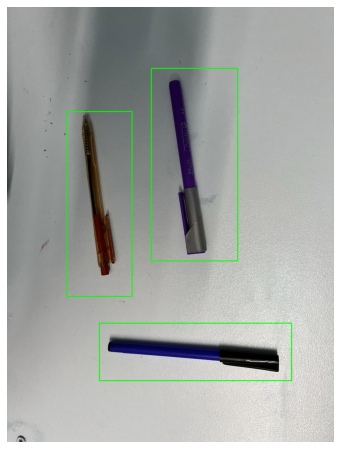

In [72]:
scaling_factor = 500
plt.figure(figsize=(img_width// scaling_factor, img_height// scaling_factor))

plt.imshow(img)
plt.axis('off')

In [73]:
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-a0hq8jjm
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-a0hq8jjm
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265176 sha256=5078847ab1dc519e468943096349fa240509575170bccf7b8369540fc4dadffd
  Stored in directory: /tmp/pip-ephem-wheel-cache-g_3jynwv/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6


In [74]:
import torch
from tqdm import tqdm

In [ ]:
# from pathlib import Path
# from tqdm import tqdm
# import numpy as np
# import shutil
# import json
# import urllib
# import PIL.Image as Image
# import cv2
# from IPython.display import display

# import seaborn as sns
# from pylab import rcParams
# import matplotlib.pyplot as plt
# from matplotlib import rc

# from sklearn.model_selection import train_test_split

# %matplotlib inline
# %config InlineBackend.figure_format='retina'
# sns.set(style='whitegrid', palette='muted', font_scale=1.2)
# rcParams['figure.figsize'] = 16, 10

# np.random.seed(42)

In [ ]:
mapping = {0: 'pen',
           1: 'rubber',
           2: 'scale',
           3: 'sharpner'}

In [75]:
!cat "stationery_dataset/labels/train/ 1.txt"

0 0.573421 0.362335 0.264317 0.442731
0 0.282673 0.452643 0.199706 0.425110
0 0.576358 0.792952 0.587372 0.132159

In [76]:
! git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14806, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 14806 (delta 78), reused 104 (delta 58), pack-reused 14669
Receiving objects: 100% (14806/14806), 13.57 MiB | 15.65 MiB/s, done.
Resolving deltas: 100% (10217/10217), done.


In [77]:
!pwd

/content


In [78]:
%cd yolov5

/content/yolov5


In [79]:
!pwd

/content/yolov5


In [81]:
!python train.py --img 640 --batch 4 --epochs 5 --data ./data/stationery.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt --name yolov5x_stationery --cache

train: weights=yolov5x.pt, cfg=./models/yolov5x.yaml, data=./data/stationery.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5x_stationery, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-239-gf33718f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

In [ ]:
# !nvidia-smi

In [ ]:
# !git clone https://github.com/NVIDIA/apex


In [ ]:
# %cd apex

In [ ]:
# !pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

In [ ]:
# !pip install PyYAML==5.3.1